# FEVRC

# Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob, os

# Import

In [2]:
'''Connects to Google Drive to load in data'''

'''
# Connect to and mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Find the dataset in google drive and assign path to variable called 'Match'
fueleconomy = glob.glob('/content/drive/MyDrive/**/cleanedfueleconomy.pkl', recursive=True)
registrations = glob.glob('/content/drive/MyDrive/**/cleanedregistrations.pkl', recursive=True)
consumption = glob.glob('/content/drive/MyDrive/**/cleanedconsumption.pkl', recursive=True)
print("Found paths:", fueleconomy, registrations, consumption)

# Using 'Match' load in the dataset using the path and skip the first 2 rows
path = fueleconomy[0]
fueleconomy = pd.read_pickle(path)
path = registrations[0]
registrations = pd.read_pickle(path)
path = consumption[0]
consumption = pd.read_pickle(path)
'''

# '''
fueleconomy = pd.read_pickle("../FuelEconomy/cleanedfueleconomy.pkl")
registrations = pd.read_pickle("../VehicleRegistrations/cleanedregistrations.pkl")
consumption = pd.read_pickle("../FuelConsumption/cleanedconsumption.pkl")
# '''

# Verify Data

In [3]:
consumption.info()
print("\n")
fueleconomy.info()
print("\n")
registrations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year                                    27 non-null     int64  
 1   AnnualConsumption(Millions of Gallons)  27 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 564.0 bytes


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 7 to 33
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            27 non-null     int64  
 1   Car             27 non-null     float64
 2   Car SUV         27 non-null     float64
 3   Pickup truck    27 non-null     float64
 4   Van             27 non-null     float64
 5   Truck SUV       27 non-null     float64
 6   AvgFuelEconomy  27 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 1.7 KB


<class 'pan

# Merge

In [4]:
# Merge all three datasets together
merged_df = pd.merge(fueleconomy, registrations, on='Year', how='inner')
merged_df = pd.merge(merged_df, consumption, on='Year', how='inner')
merged_df

,Year,Car,Car SUV,Pickup truck,Van,Truck SUV,AvgFuelEconomy,Automobile_Registrations,Motorcycle_Registrations,Licensed_Drivers,TotalRegistrations,AnnualConsumption(Millions of Gallons)
0,1995,23.44,17.81,16.89,18.08,16.00,18.44,1.360660e+08,3767029.00,1.766285e+08,139833074.0,119400.0
1,1996,23.33,18.43,17.15,18.34,16.23,18.70,1.297283e+08,3871237.14,1.795393e+08,133599578.0,121294.0
2,1997,23.37,19.23,16.84,18.18,16.13,18.75,1.297487e+08,3826373.00,1.827092e+08,133575077.0,122898.0
3,1998,23.37,18.24,17.00,18.70,16.16,18.69,1.318385e+08,3879450.00,1.848610e+08,135717988.0,126525.0
4,1999,23.00,18.51,16.29,18.28,16.07,18.43,1.324320e+08,4152433.00,1.871704e+08,136584477.0,129244.0
5,2000,22.91,17.89,16.65,18.61,16.01,18.41,1.336214e+08,4346068.00,1.906250e+08,137967488.0,130233.0
6,2001,23.05,18.83,15.95,18.04,16.41,18.46,1.376335e+08,4903056.00,1.912757e+08,142536523.0,131992.0
7,2002,23.08,19.30,15.75,18.70,16.31,18.63,1.359207e+08,5004156.00,1.942956e+08,140924833.0,135637.0
8,2003,23.28,19.91,16.08,18.98,16.42,18.93,1.356699e+08,5370035.00,1.961657e+08,141039932.0,136972.0
9,2004,23.14,19.97,15.74,19.16,16.47,18.90,1.364307e+08,5780870.00,1.988889e+08,142211521.0,139968.0


# Correlation Matrix

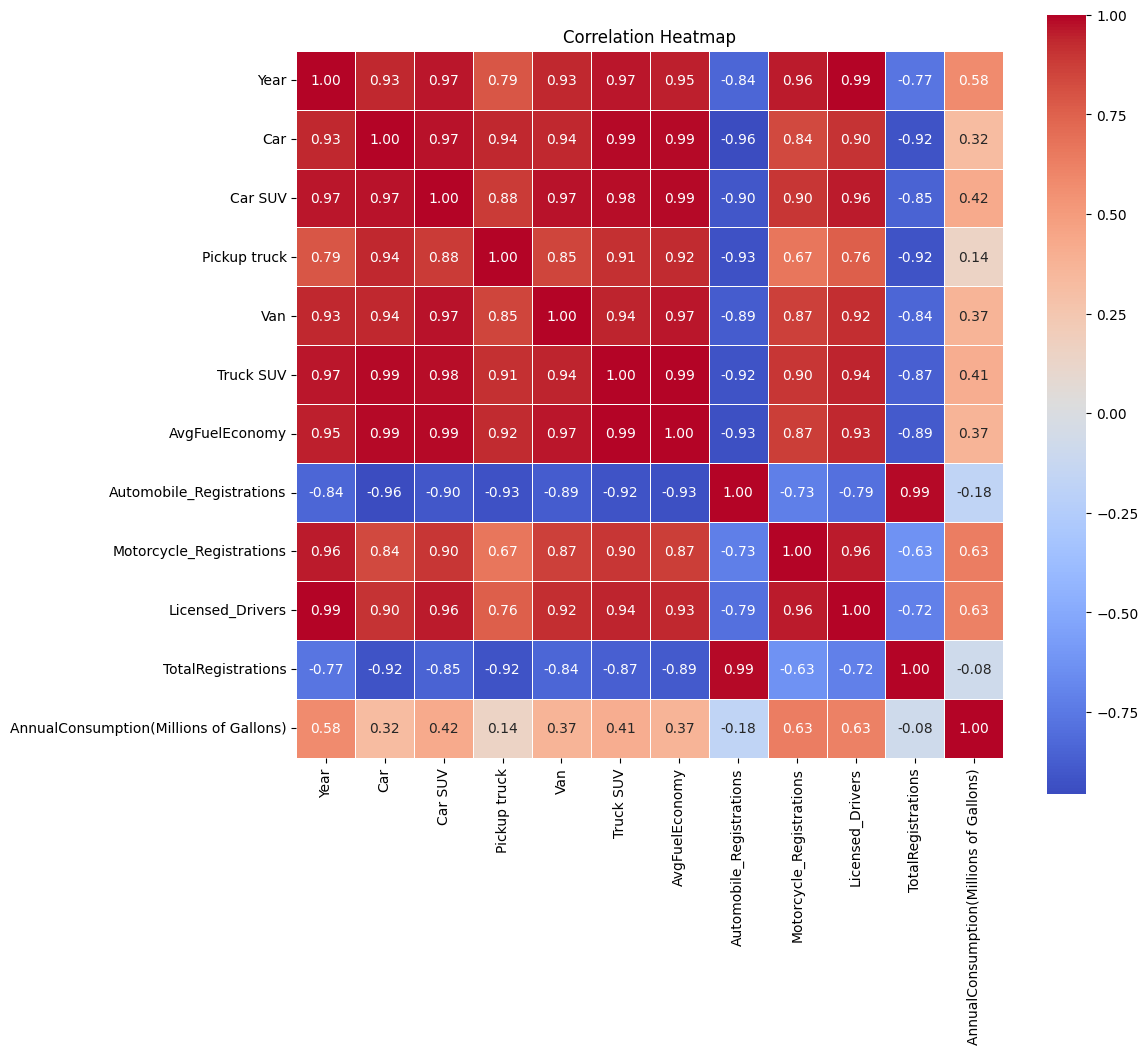

In [5]:
# If not already sorted:
df = merged_df.sort_values("Year").reset_index(drop=True)

# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Display the correlation matrix
# print("Correlation Matrix:")
# print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

- Will use licensed drivers, and avg fuel economy as predictor variables
- can explore adding one vehicle class at a time or motorcycle registrations

# Multiple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Sort by year and split manually
df = df.sort_values('Year')

# Use 1995–2016 for training, 2017–2019 for testing
train_df = df[df['Year'] <= 2016]
test_df = df[(df['Year'] >= 2017) & (df['Year'] <= 2019)]

X_train = train_df[['Licensed_Drivers', 'AvgFuelEconomy']]
y_train = train_df['AnnualConsumption(Millions of Gallons)']
X_test = test_df[['Licensed_Drivers', 'AvgFuelEconomy']]
y_test = test_df['AnnualConsumption(Millions of Gallons)']

# Refit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output the evaluation metrics
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", r2)
print("RMSE:", rmse)

Model Coefficients: [ 8.85271222e-04 -3.84107833e+03]
Intercept: 34089.142842293426
R^2 Score: -129.05320081822285
RMSE: 1528.4407727949717


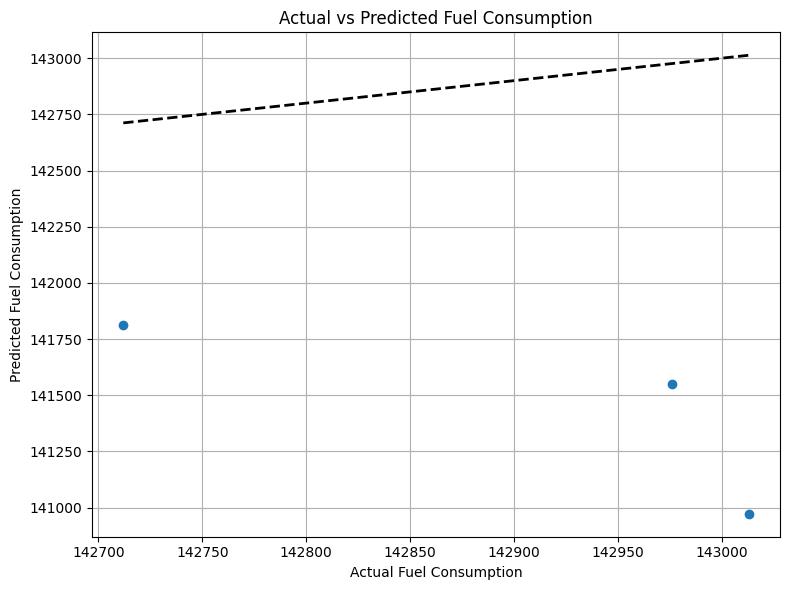

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.grid(True)
plt.tight_layout()
plt.show()

# PCA

In [9]:
features_for_pca = [
    'Car', 'Car SUV', 'Pickup truck', 'Van', 'Truck SUV',
    'AvgFuelEconomy',
    'Automobile_Registrations', 'Motorcycle_Registrations',
    'Licensed_Drivers', 'TotalRegistrations'
]

from sklearn.preprocessing import StandardScaler

# Extract the feature set
X_pca = df[features_for_pca].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

In [10]:
from sklearn.decomposition import PCA

# Apply PCA (keep all components initially)
pca = PCA()
X_pca_transformed = pca.fit_transform(X_scaled)

# Check explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Display variance explained
for i, var in enumerate(cumulative_variance):
    print(f"PC{i+1}: {var:.4f} cumulative variance explained")

PC1: 0.9081 cumulative variance explained
PC2: 0.9741 cumulative variance explained
PC3: 0.9852 cumulative variance explained
PC4: 0.9936 cumulative variance explained
PC5: 0.9973 cumulative variance explained
PC6: 0.9991 cumulative variance explained
PC7: 0.9998 cumulative variance explained
PC8: 1.0000 cumulative variance explained
PC9: 1.0000 cumulative variance explained
PC10: 1.0000 cumulative variance explained


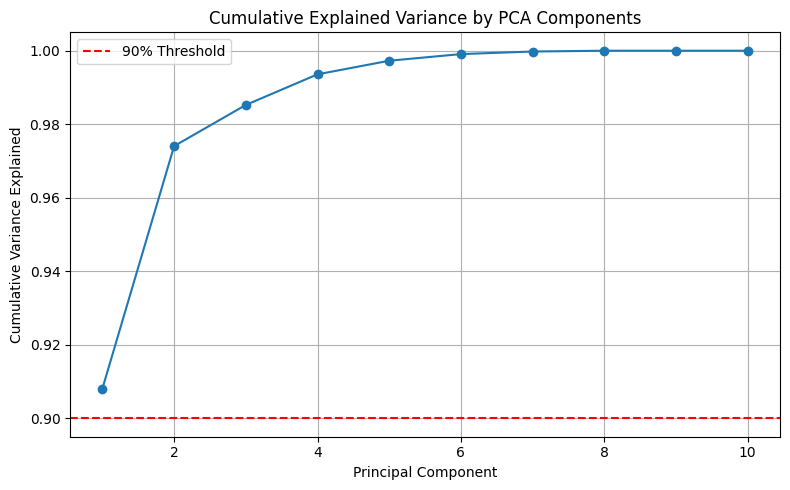

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

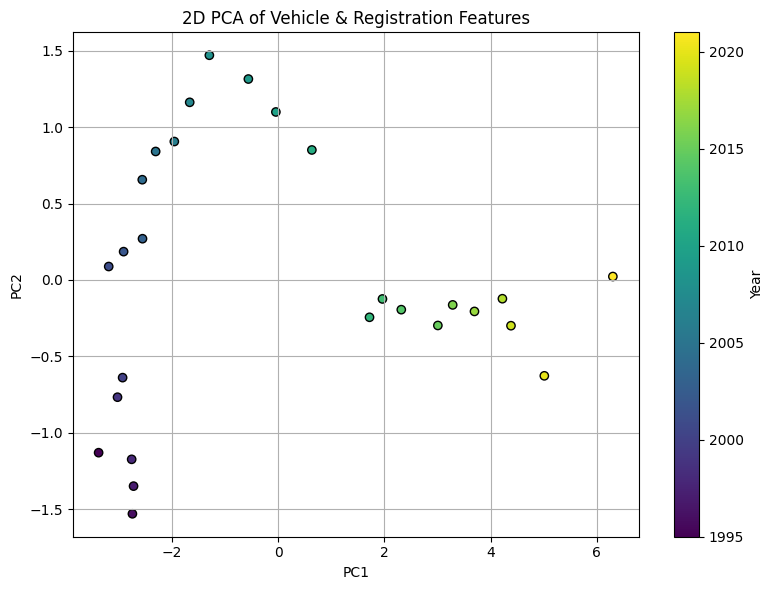

In [12]:
# Reduce to 2 components for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Year'], cmap='viridis', edgecolor='k')
plt.title('2D PCA of Vehicle & Registration Features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Use only first 2 PCs
X_pca_2 = X_pca_transformed[:, :2]

# Train/test split (time-aware)
X_train_pca = X_pca_2[:22]   # 1995–2016 (22 years)
X_test_pca = X_pca_2[22:25]  # 2017–2019 (3 years)

# Train MLR on PCA features
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = model_pca.predict(X_test_pca)

# output evaluation metrics
r2_pca = r2_score(y_test, y_pred_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
print("PCA Model Coefficients:", model_pca.coef_)
print("PCA Model Intercept:", model_pca.intercept_)
print("PCA R^2 Score:", r2_pca)
print("PCA RMSE:", rmse_pca)

PCA Model Coefficients: [1124.2443279  5586.57021249]
PCA Model Intercept: 135285.7162752663
PCA R^2 Score: -977.2797258569963
PCA RMSE: 4191.984019270816


# ARIMAX (?)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [15]:
df_ts = df[['Year', 'AnnualConsumption(Millions of Gallons)', 'Licensed_Drivers', 'AvgFuelEconomy']].copy()
df_ts.set_index('Year', inplace=True)

# Convert Year column to datetime index
df_ts['Year'] = pd.to_datetime(df_ts.index, format='%Y')
df_ts.set_index('Year', inplace=True)

y = df_ts['AnnualConsumption(Millions of Gallons)']
X_exog = df_ts[['Licensed_Drivers', 'AvgFuelEconomy']]

# TRAIN: 1995–2016
y_train = y[:'2016-12-31']
X_train = X_exog[:'2016-12-31']

# TEST: 2017–2019
y_test = y['2017-01-01':'2019-12-31']
X_test = X_exog['2017-01-01':'2019-12-31']

model_arimax = SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 1, 1),  # AR, differencing, MA terms
    enforce_stationarity=False,
    enforce_invertibility=False
)

results_arimax = model_arimax.fit(disp=False)


/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/py38/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


In [16]:
# Predict for 2017–2019
start = len(y_train)        # 2017
end = len(y_train) + len(y_test) - 1   # 2019

forecast_arimax = results_arimax.predict(
    start=start,
    end=end,
    exog=X_test
)

# Evaluation
from sklearn.metrics import r2_score, mean_squared_error

r2_arimax = r2_score(y_test, forecast_arimax)
rmse_arimax = np.sqrt(mean_squared_error(y_test, forecast_arimax))

print(f"ARIMAX R²: {r2_arimax:.4f}")
print(f"ARIMAX RMSE: {rmse_arimax:,.2f}")

ARIMAX R²: -3344.4775
ARIMAX RMSE: 7,752.06


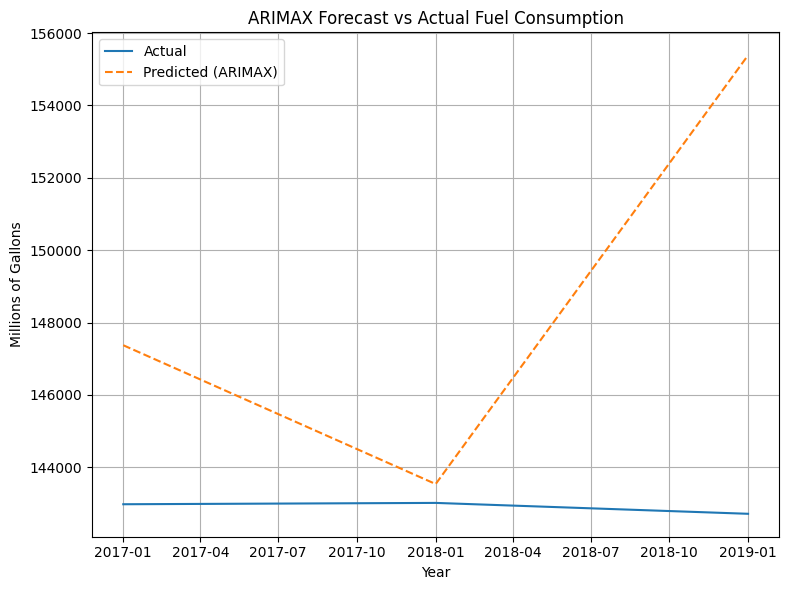

In [17]:
plt.figure(figsize=(8,6))
plt.plot(y_test, label='Actual')
plt.plot(forecast_arimax, label='Predicted (ARIMAX)', linestyle='--')
plt.title('ARIMAX Forecast vs Actual Fuel Consumption')
plt.ylabel('Millions of Gallons')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Export

In [18]:
merged_df.head()

,Year,Car,Car SUV,Pickup truck,Van,Truck SUV,AvgFuelEconomy,Automobile_Registrations,Motorcycle_Registrations,Licensed_Drivers,TotalRegistrations,AnnualConsumption(Millions of Gallons)
0,1995,23.44,17.81,16.89,18.08,16.00,18.44,136066045.0,3767029.00,176628482.0,139833074.0,119400.0
1,1996,23.33,18.43,17.15,18.34,16.23,18.70,129728341.0,3871237.14,179539340.0,133599578.0,121294.0
2,1997,23.37,19.23,16.84,18.18,16.13,18.75,129748704.0,3826373.00,182709204.0,133575077.0,122898.0
3,1998,23.37,18.24,17.00,18.70,16.16,18.69,131838538.0,3879450.00,184860969.0,135717988.0,126525.0
4,1999,23.00,18.51,16.29,18.28,16.07,18.43,132432044.0,4152433.00,187170420.0,136584477.0,129244.0


In [19]:
# Save as CSV
merged_df.to_csv("FEVRC_Dataset.csv", index=False)

# Optional: Save as Pickle for faster loading
merged_df.to_pickle("FEVRC_Dataset.pkl")